In [1]:
using CSV
using DataFrames


In [2]:
using StatsBase
using Statistics

In [100]:
using Gadfly

┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1260


In [3]:
using DataStructures

In [4]:
df = CSV.read("athlete_events.csv")


,ID,Name,Sex,Age,Height,Weight,Team
,Int64,String,String,String,String,String,String
1,1,A Dijiang,M,24,180,80,China
2,2,A Lamusi,M,23,170,60,China
3,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark
4,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden
5,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands
6,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands
7,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands
8,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands
9,5,Christine Jacoba Aaftink,F,27,185,82,Netherlands


In [5]:
first(df,10)

,ID,Name,Sex,Age,Height,Weight,Team
,Int64,String,String,String,String,String,String
1,1,A Dijiang,M,24,180,80,China
2,2,A Lamusi,M,23,170,60,China
3,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark
4,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden
5,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands
6,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands
7,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands
8,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands
9,5,Christine Jacoba Aaftink,F,27,185,82,Netherlands


In [6]:
df[:Season]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[6]:1
└ @ Core In[6]:1


271116-element CSV.Column{String,PooledString}:
 "Summer"
 "Summer"
 "Summer"
 "Summer"
 "Winter"
 "Winter"
 "Winter"
 "Winter"
 "Winter"
 "Winter"
 "Winter"
 "Winter"
 "Winter"
 ⋮
 "Winter"
 "Summer"
 "Summer"
 "Summer"
 "Summer"
 "Summer"
 "Summer"
 "Winter"
 "Winter"
 "Winter"
 "Winter"
 "Winter"

In [7]:
df2 = CSV.read("noc_regions.csv")
first(df2,10)

thread = 1 warning: only found 2 / 3 columns on data row: 230. Filling remaining columns with `missing`


,NOC,region,notes
,String,String,String⍰
1,AFG,Afghanistan,missing
2,AHO,Curacao,Netherlands Antilles
3,ALB,Albania,missing
4,ALG,Algeria,missing
5,AND,Andorra,missing
6,ANG,Angola,missing
7,ANT,Antigua,Antigua and Barbuda
8,ANZ,Australia,Australasia
9,ARG,Argentina,missing


In [8]:
@show size(df)
@show size(df2)

size(df) = (271116, 15)
size(df2) = (230, 3)


(230, 3)

In [9]:
countmap(df[:Season])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[9]:1
└ @ Core In[9]:1


Dict{String,Int64} with 2 entries:
  "Summer" => 222552
  "Winter" => 48564

In [10]:
names(df)

15-element Array{Symbol,1}:
 :ID
 :Name
 :Sex
 :Age
 :Height
 :Weight
 :Team
 :NOC
 :Games
 :Year
 :Season
 :City
 :Sport
 :Event
 :Medal

In [11]:
using DataFramesMeta

In [12]:
winter = @where(df, :Season .== "Winter")

,ID,Name,Sex,Age,Height,Weight,Team
,Int64,String,String,String,String,String,String
1,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands
2,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands
3,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands
4,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands
5,5,Christine Jacoba Aaftink,F,27,185,82,Netherlands
6,5,Christine Jacoba Aaftink,F,27,185,82,Netherlands
7,6,Per Knut Aaland,M,31,188,75,United States
8,6,Per Knut Aaland,M,31,188,75,United States
9,6,Per Knut Aaland,M,31,188,75,United States


In [13]:
summer = @where(df, :Season .== "Summer")

,ID,Name,Sex,Age,Height,Weight,Team
,Int64,String,String,String,String,String,String
1,1,A Dijiang,M,24,180,80,China
2,2,A Lamusi,M,23,170,60,China
3,3,Gunnar Nielsen Aaby,M,24,NA,NA,Denmark
4,4,Edgar Lindenau Aabye,M,34,NA,NA,Denmark/Sweden
5,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18,168,NA,Netherlands
6,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18,168,NA,Netherlands
7,10,"Einar Ferdinand ""Einari"" Aalto",M,26,NA,NA,Finland
8,12,Jyri Tapani Aalto,M,31,172,70,Finland
9,13,Minna Maarit Aalto,F,30,159,55.5,Finland


In [14]:
using Plots

In [15]:
summer = DataFrame(summer)
winter = DataFrame(winter)

,ID,Name,Sex,Age,Height,Weight,Team
,Int64,String,String,String,String,String,String
1,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands
2,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands
3,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands
4,5,Christine Jacoba Aaftink,F,25,185,82,Netherlands
5,5,Christine Jacoba Aaftink,F,27,185,82,Netherlands
6,5,Christine Jacoba Aaftink,F,27,185,82,Netherlands
7,6,Per Knut Aaland,M,31,188,75,United States
8,6,Per Knut Aaland,M,31,188,75,United States
9,6,Per Knut Aaland,M,31,188,75,United States


In [16]:
df[:Medal]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[16]:1
└ @ Core In[16]:1


271116-element CSV.Column{String,PooledString}:
 "NA"
 "NA"
 "NA"
 "Gold"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 ⋮
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"
 "NA"

In [17]:
using DataStructures

In [18]:
sort(countmap(summer[:Sport]))

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[18]:1
└ @ Core In[18]:1
┌ Warning: `sort(d::Dict; args...)` is deprecated, use `sort!(OrderedDict(d); args...)` instead.
│   caller = top-level scope at In[18]:1
└ @ Core In[18]:1


OrderedDict{String,Int64} with 52 entries:
  "Aeronautics"      => 1
  "Alpinism"         => 4
  "Archery"          => 2334
  "Art Competitions" => 3578
  "Athletics"        => 38624
  "Badminton"        => 1457
  "Baseball"         => 894
  "Basketball"       => 4536
  "Basque Pelota"    => 2
  "Beach Volleyball" => 564
  "Boxing"           => 6047
  "Canoeing"         => 6171
  "Cricket"          => 24
  "Croquet"          => 19
  "Cycling"          => 10859
  "Diving"           => 2842
  "Equestrianism"    => 6344
  "Fencing"          => 10735
  "Figure Skating"   => 54
  "Football"         => 6745
  "Golf"             => 247
  "Gymnastics"       => 26707
  "Handball"         => 3665
  "Hockey"           => 5417
  "Ice Hockey"       => 60
  ⋮                  => ⋮

In [19]:
basketball = DataFrame(@where(summer , :Sport .== "Basketball" ))
bas  = basketball[:Height]
bas = bas[bas.!="NA",:]
bas = parse.(Int64,bas[:,:])
ceil(mean(bas))

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[19]:2
└ @ Core In[19]:2


191.0

In [20]:
bas = summer[summer[:Height].!="NA",:]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[20]:1
└ @ Core In[20]:1


,ID,Name,Sex,Age,Height,Weight,Team
,Int64,String,String,String,String,String,String
1,1,A Dijiang,M,24,180,80,China
2,2,A Lamusi,M,23,170,60,China
3,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18,168,NA,Netherlands
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18,168,NA,Netherlands
5,12,Jyri Tapani Aalto,M,31,172,70,Finland
6,13,Minna Maarit Aalto,F,30,159,55.5,Finland
7,13,Minna Maarit Aalto,F,34,159,55.5,Finland
8,17,Paavo Johannes Aaltonen,M,28,175,64,Finland
9,17,Paavo Johannes Aaltonen,M,28,175,64,Finland


In [21]:
height = groupby(bas,:Sport)
#combine(height , :Height => mean)

,ID,Name,Sex,Age,Height,Weight,Team
,Int64,String,String,String,String,String,String
1,1,A Dijiang,M,24,180,80,China
2,69,Tamara Abalde Daz,F,19,185,72,Spain
3,136,Alessandro Abbio,M,29,195,85,Italy
4,192,Ahmed El-Sayed Abdel Hamid Mobarak,M,25,189,85,Egypt
5,199,Amir Abdel Meguid,M,23,178,67,Egypt
6,199,Amir Abdel Meguid,M,27,178,67,Egypt
7,202,Awad Abdel Nabi Awad,M,19,198,80,Egypt
8,202,Awad Abdel Nabi Awad,M,23,198,80,Egypt
9,270,Alaa El-Din Abdoun,M,23,188,78,Egypt


In [22]:
bas[:height] = [parse(Int,x) for x in bas[:Height]] 

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[22]:1
└ @ Core In[22]:1
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[22]:1
└ @ Core In[22]:1


170695-element Array{Int64,1}:
 180
 170
 168
 168
 172
 159
 159
 175
 175
 175
 175
 175
 175
   ⋮
 192
 200
 171
 173
 171
 171
 168
 168
 175
 183
 183
 171

In [23]:
typeof(bas[:height])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[23]:1
└ @ Core In[23]:1


Array{Int64,1}

In [24]:
df = combine(height , :height => mean)


,Sport,height_mean
,String,Float64
1,Basketball,190.87
2,Judo,174.187
3,Athletics,176.256
4,Badminton,174.179
5,Sailing,178.262
6,Gymnastics,162.936
7,Handball,183.385
8,Weightlifting,167.825
9,Wrestling,172.359


In [25]:
df[:height_mean]=ceil.(df[:height_mean])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[25]:1
└ @ Core In[25]:1
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[25]:1
└ @ Core In[25]:1


46-element Array{Float64,1}:
 191.0
 175.0
 177.0
 175.0
 179.0
 163.0
 184.0
 168.0
 173.0
 185.0
 179.0
 176.0
 175.0
   ⋮
 174.0
 175.0
 177.0
 175.0
 183.0
 176.0
 174.0
 176.0
 181.0
 170.0
 179.0
 176.0

In [26]:
#df[:height_mean_ceil] = [parse(Int,x) for x in df[:height_mean]] 

In [27]:
using Plots

In [28]:
#barh(df[:Sport],df[:height_mean])

In [29]:
using Vega
#barplot(x = df[:Sport], y =df[:height_mean] , horizontal = true)

In [30]:
using VegaLite

<h3> Average height of players across different sports

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[31]:1
└ @ Core In[31]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[31]:1
└ @ Core In[31]:1


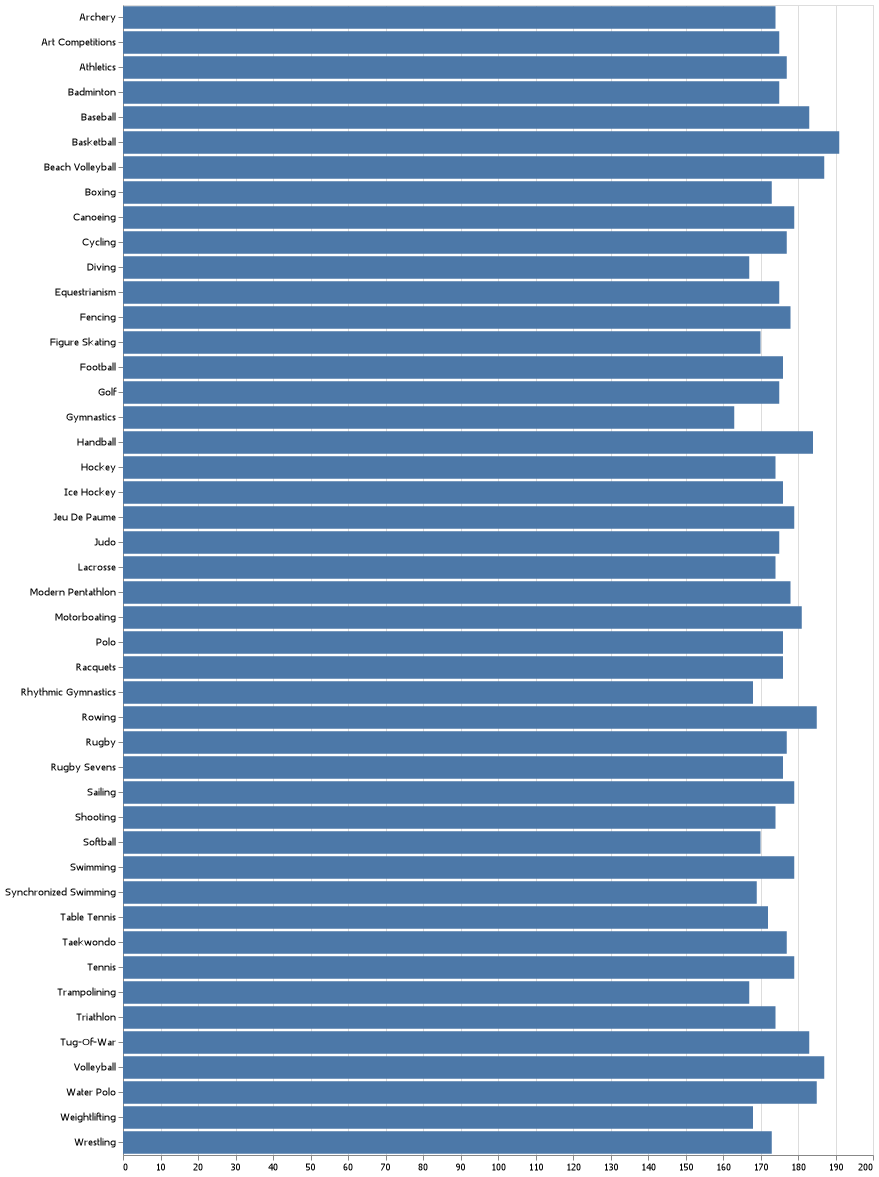

In [31]:
@vlplot(
    height={step=25},
    width=750,
    :bar,
    y=df[:Sport],
    x=df[:height_mean],
)

<h3> Average height of players at winter games across the sports

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[32]:1
└ @ Core In[32]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[32]:3
└ @ Core In[32]:3
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[32]:3
└ @ Core In[32]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[32]:5
└ @ Core In[32]:5
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[32]:5
└ @ Core In[32]:5
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!

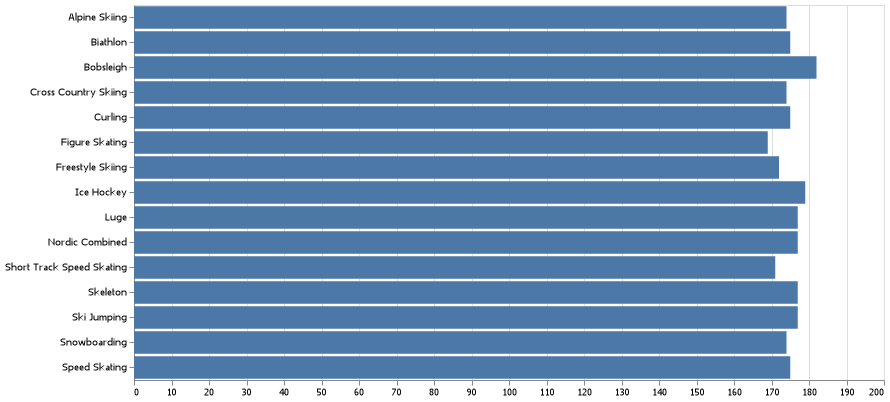

In [32]:
bas = winter[winter[:Height].!="NA",:]
height = groupby(bas,:Sport)
bas[:height] = [parse(Int,x) for x in bas[:Height]] 
df = combine(height , :height => mean)
df[:height_mean]=ceil.(df[:height_mean])
@vlplot(
    height={step=25},
    width=750,
    :bar,
    y=df[:Sport],
    x=df[:height_mean]
)

In [33]:
countmap(summer[:Sport])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[33]:1
└ @ Core In[33]:1


Dict{String,Int64} with 52 entries:
  "Handball"       => 3665
  "Basketball"     => 4536
  "Basque Pelota"  => 2
  "Diving"         => 2842
  "Fencing"        => 10735
  "Weightlifting"  => 3937
  "Ice Hockey"     => 60
  "Motorboating"   => 17
  "Croquet"        => 19
  "Triathlon"      => 529
  "Polo"           => 95
  "Trampolining"   => 152
  "Cricket"        => 24
  "Hockey"         => 5417
  "Roque"          => 4
  "Rowing"         => 10595
  "Football"       => 6745
  "Boxing"         => 6047
  "Rugby Sevens"   => 299
  "Judo"           => 3801
  "Swimming"       => 23195
  "Shooting"       => 11448
  "Volleyball"     => 3404
  "Canoeing"       => 6171
  "Gymnastics"     => 26707
  ⋮                => ⋮

<h1> Swimming

In [34]:
swimming = @where(summer, :Sport .== "Swimming")

,ID,Name,Sex,Age,Height,Weight,Team
,Int64,String,String,String,String,String,String
1,10,"Einar Ferdinand ""Einari"" Aalto",M,26,NA,NA,Finland
2,15,Arvo Ossian Aaltonen,M,22,NA,NA,Finland
3,15,Arvo Ossian Aaltonen,M,22,NA,NA,Finland
4,15,Arvo Ossian Aaltonen,M,30,NA,NA,Finland
5,15,Arvo Ossian Aaltonen,M,30,NA,NA,Finland
6,15,Arvo Ossian Aaltonen,M,34,NA,NA,Finland
7,36,Stefan Remco Aartsen,M,21,194,78,Netherlands
8,36,Stefan Remco Aartsen,M,21,194,78,Netherlands
9,36,Stefan Remco Aartsen,M,21,194,78,Netherlands


<h1> Most medal in Swimming by country

In [52]:
bas = swimming[swimming[:Medal].!="NA",:]
men = @where(bas, :Sex .== "M")
women = @where(bas, :Sex .== "F")
#df = groupby(bas,:Team)
#df = combine(df,:Medal => countmap)
d = countmap(men[:Team])
s = sort!(collect(d), by=p->p[2],rev=true)
d = DataFrame(s)
ten= first(d,10)


┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[52]:1
└ @ Core In[52]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[52]:4
└ @ Core In[52]:4


,first,second
,String,Int64
1,United States,595
2,Australia,218
3,Japan,97
4,Soviet Union,97
5,Great Britain,74
6,Germany,69
7,Hungary,63
8,France,53
9,Canada,47


In [53]:
pyplot()

Plots.PyPlotBackend()

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[54]:1
└ @ Core In[54]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[54]:1
└ @ Core In[54]:1


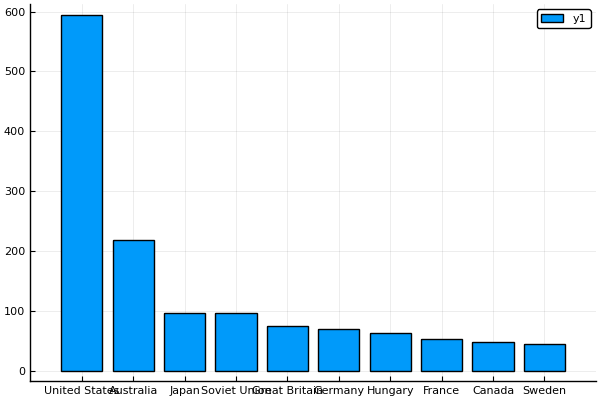

In [54]:
bar(ten[:first],ten[:second])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[55]:1
└ @ Core In[55]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[55]:1
└ @ Core In[55]:1


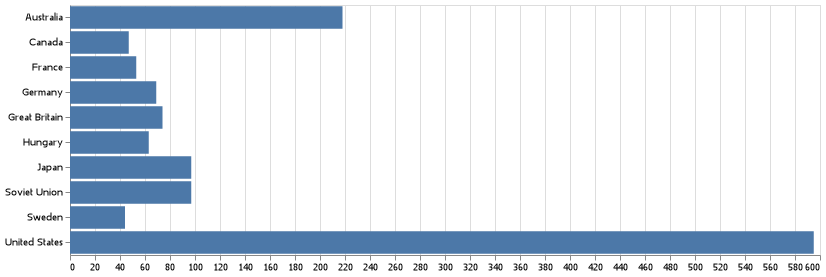

In [55]:
@vlplot(
    height={step=25},
    width=750,
    :bar,
    
    x=ten[:second],
    y=ten[:first]
)

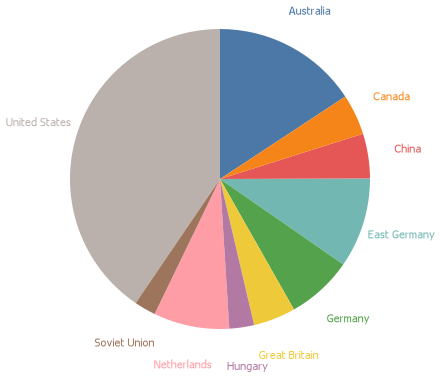

In [50]:
ten |> @vlplot(
    theta={:second, stack=true},
    color={"first:n", legend=nothing},
    view={stroke=nothing}) +
@vlplot(mark={:arc, outerRadius=150}) +
@vlplot(mark={:text, radius=190}, text="first:n")

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[40]:1
└ @ Core In[40]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[40]:5
└ @ Core In[40]:5
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[40]:5
└ @ Core In[40]:5


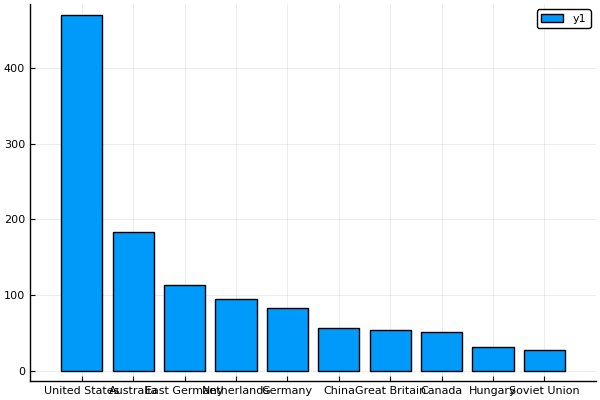

In [40]:
d = countmap(women[:Team])
s = sort!(collect(d), by=p->p[2],rev=true)
d = DataFrame(s)
ten= first(d,10)

bar(ten[:first],ten[:second])

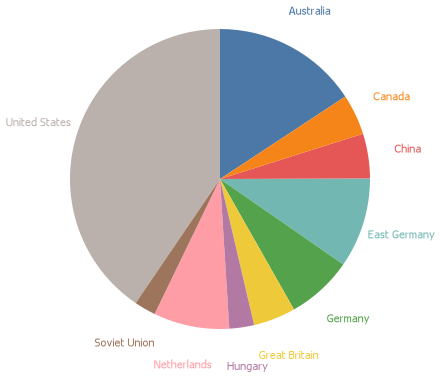

In [47]:
ten |> @vlplot(
    theta={:second, stack=true},
    color={"first:n", legend=nothing},
    view={stroke=nothing}) +
@vlplot(mark={:arc, outerRadius=150}) +
@vlplot(mark={:text, radius=190}, text="first:n")

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[42]:1
└ @ Core In[42]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[42]:1
└ @ Core In[42]:1


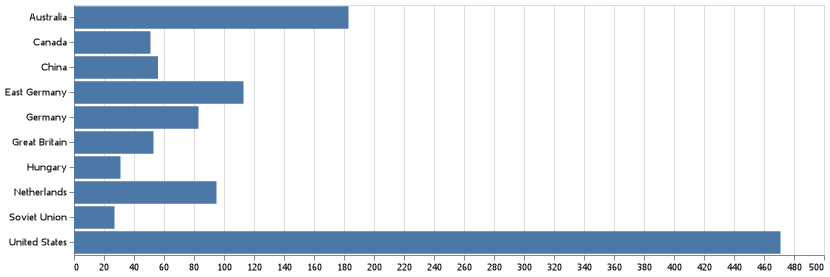

In [42]:
@vlplot(
    height={step=25},
    width=750,
    :bar,
    
    x=ten[:second],
    y=ten[:first]
)

<h1> Most Coveted Swimmers 

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[69]:1
└ @ Core In[69]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[69]:5
└ @ Core In[69]:5
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[69]:5
└ @ Core In[69]:5


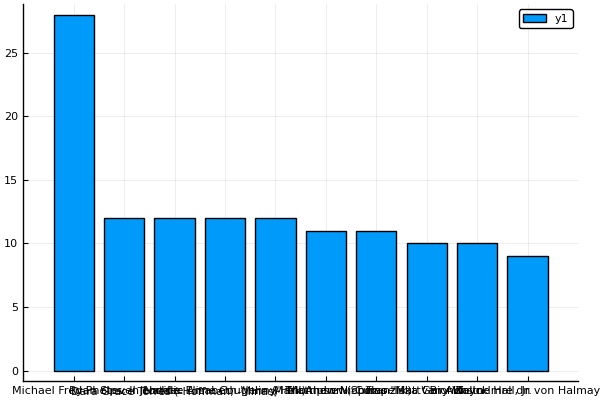

In [69]:
d = countmap(bas[:Name])
s = sort!(collect(d), by=p->p[2],rev=true)
d = DataFrame(s)
tenn= first(d,10)
bar(tenn[:first],tenn[:second])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[70]:1
└ @ Core In[70]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[70]:1
└ @ Core In[70]:1


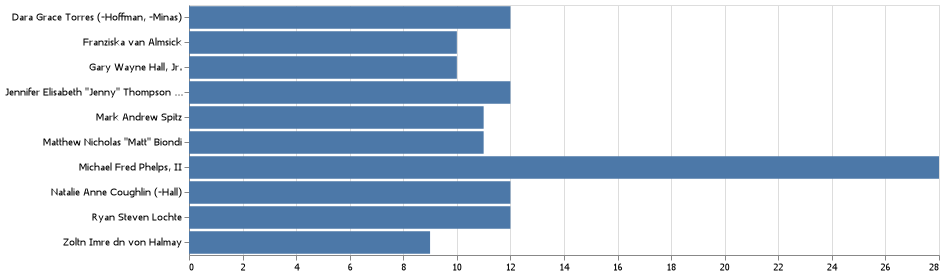

In [70]:
@vlplot(
    height={step=25},
    width=750,
    :bar,
    
    x=tenn[:second],
    y=tenn[:first]
)

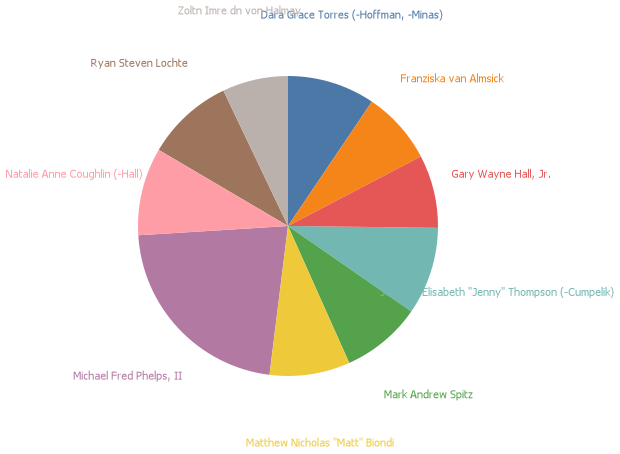

In [71]:
tenn |> @vlplot(
    theta={:second, stack=true},
    color={"first:n", legend=nothing},
    view={stroke=nothing}) +
@vlplot(mark={:arc, outerRadius=150}) +
@vlplot(mark={:text, radius=220}, text="first:n")

In [78]:
names(bas)

15-element Array{Symbol,1}:
 :ID
 :Name
 :Sex
 :Age
 :Height
 :Weight
 :Team
 :NOC
 :Games
 :Year
 :Season
 :City
 :Sport
 :Event
 :Medal

In [86]:
#violin(bas[:Height],bas[:Weight])

In [91]:
bas[:Games]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[91]:1
└ @ Core In[91]:1


3048-element Array{String,1}:
 "1920 Summer"
 "1920 Summer"
 "1936 Summer"
 "1984 Summer"
 "1956 Summer"
 "1972 Summer"
 "1972 Summer"
 "2016 Summer"
 "1980 Summer"
 "1904 Summer"
 "1912 Summer"
 "2008 Summer"
 "2008 Summer"
 ⋮
 "1996 Summer"
 "1996 Summer"
 "1948 Summer"
 "1988 Summer"
 "1984 Summer"
 "1968 Summer"
 "1928 Summer"
 "1984 Summer"
 "2000 Summer"
 "1980 Summer"
 "2012 Summer"
 "2004 Summer"

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[93]:1
└ @ Core In[93]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[93]:1
└ @ Core In[93]:1


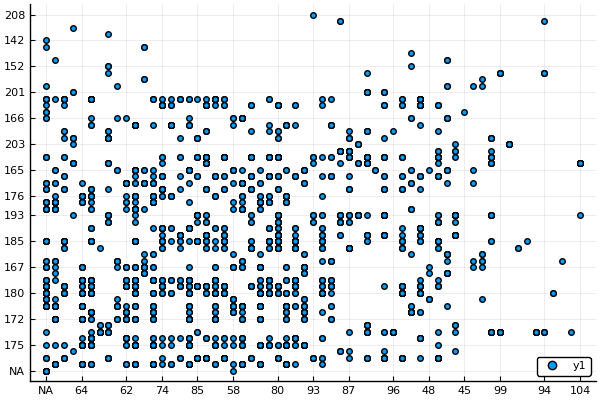

In [93]:
scatter(bas[:Weight],bas[:Height])

WARN Missing type for channel "color", using "nominal" instead.
WARN Missing type for channel "color", using "nominal" instead.
WARN Missing type for channel "color", using "nominal" instead.
WARN Missing type for channel "color", using "nominal" instead.


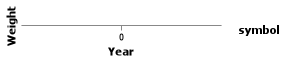

In [102]:
women |> @vlplot(
    transform=[{filter="datum.symbol==='Weight'"}],
    mark={
        :line,
        point=true
    },
    x=:Year,
    y=:Weight,
    color=:symbol
)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[98]:1
└ @ Core In[98]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[98]:1
└ @ Core In[98]:1


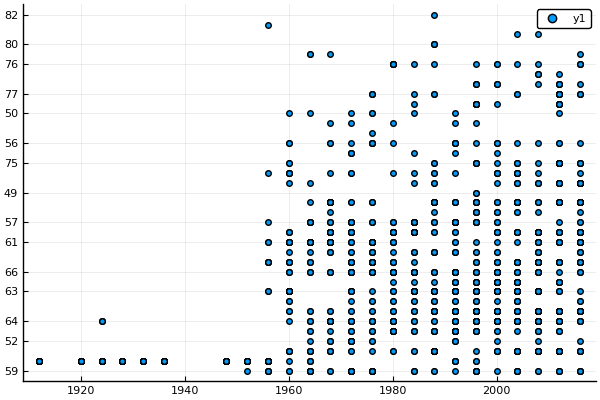

In [98]:
scatter(women[:Year],women[:Weight])

In [1]:
#Geom.point(women[:Year],women[:Weight])